### Learning to use ANNData


In [1]:
from hest import iter_hest
id = ["MISC12"]
sample = iter_hest("../hest_data",id_list = id).__next__()
print(dict(sample.meta))

/home/isaac/dev/sfu/cmpt415/cmpt415_spatial_domain_variability/venv/lib/python3.12/site-packages/hestcore/wsi.py:27: UserWarning: CuImage is not available. Ensure you have a GPU and cucim installed to use GPU acceleration.
  warnings.warn("CuImage is not available. Ensure you have a GPU and cucim installed to use GPU acceleration.")


{'pixel_size_um_embedded': nan, 'pixel_size_um_estimated': 0.7251346907927791, 'fullres_height': 13332, 'fullres_width': 13332, 'spots_under_tissue': 4226, 'spot_estimate_dist': 49, 'spot_diameter': 55.0, 'inter_spot_dist': 100.0, 'adata_nb_col': 33538, 'fullres_px_width': 13332, 'fullres_px_height': 13332, 'dataset_title': 'spatialLIBD', 'id': 'MISC12', 'image_filename': 'MISC12.tif', 'organ': 'Brain', 'disease_state': 'Healthy', 'oncotree_code': nan, 'species': 'Homo sapiens', 'patient': '   ', 'st_technology': 'Visium', 'data_publication_date': nan, 'license': nan, 'study_link': 'https://www.nature.com/articles/s41593-020-00787-0#data-availability', 'download_page_link1': 'https://github.com/LieberInstitute/spatialLIBD#raw-data', 'preservation_method': 'Fresh Frozen', 'nb_genes': 33538, 'treatment_comment': nan, 'magnification': '20x', 'tissue': 'dorsolateral prefrontal cortex', 'disease_comment': nan, 'subseries': '151507'}


sample id is under ```subseries``` key

In [2]:
sample.adata

AnnData object with n_obs × n_vars = 4226 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'pxl_col_in_fullres', 'pxl_row_in_fullres', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mito'
    uns: 'spatial'
    obsm: 'spatial'

In [3]:
import numpy as np
sample.adata.obs['pxl_row_in_fullres'].max()


np.float64(11747.663027226103)

* Each row is a spot
* each column is a gene?

In [4]:
sample.adata.X[0,:].max()

np.float32(16.0)

In [5]:
sample.adata.var

,gene_ids,feature_types,genome,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,mito
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38,1,0.000237,0.000237,99.976337,1.0,0.693147,False
FAM138A,ENSG00000237613,Gene Expression,GRCh38,0,0.000000,0.000000,100.000000,0.0,0.000000,False
OR4F5,ENSG00000186092,Gene Expression,GRCh38,0,0.000000,0.000000,100.000000,0.0,0.000000,False
AL627309.1,ENSG00000238009,Gene Expression,GRCh38,6,0.001420,0.001419,99.858022,6.0,1.945910,False
AL627309.3,ENSG00000239945,Gene Expression,GRCh38,0,0.000000,0.000000,100.000000,0.0,0.000000,False
...,...,...,...,...,...,...,...,...,...,...
AC233755.2,ENSG00000277856,Gene Expression,GRCh38,0,0.000000,0.000000,100.000000,0.0,0.000000,False
AC233755.1,ENSG00000275063,Gene Expression,GRCh38,0,0.000000,0.000000,100.000000,0.0,0.000000,False
AC240274.1,ENSG00000271254,Gene Expression,GRCh38,6,0.001420,0.001419,99.858022,6.0,1.945910,False
AC213203.1,ENSG00000277475,Gene Expression,GRCh38,0,0.000000,0.000000,100.000000,0.0,0.000000,False


/home/isaac/dev/sfu/cmpt415/cmpt415_spatial_domain_variability/venv/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/home/isaac/dev/sfu/cmpt415/cmpt415_spatial_domain_variability/venv/lib/python3.12/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/isaac/dev/sfu/cmpt415/HEST/src/hest/HESTData.py:1381: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  fig = sc.pl.spatial(adata, show=False, img_key="downscaled_fullres", color=[key], title=f"in_tissue spots", return_fig=True, **pl_kwargs)


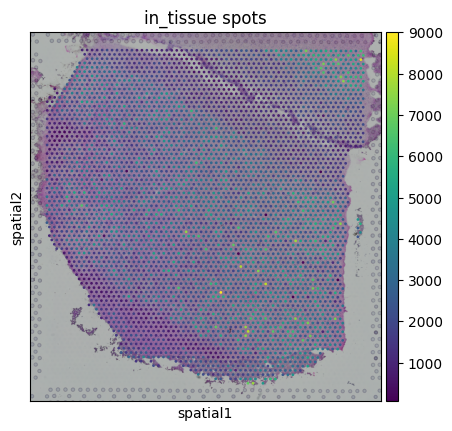

In [6]:
import squidpy as sq
sample.save_spatial_plot('.')

In [7]:
sample.segment_tissue(method='otsu') 
sample.save_tissue_seg_jpg('.', 'otsu_tissue_seq')

/tmp/ipykernel_16151/948328550.py:2: DeprecationWarning: Call to deprecated function save_tissue_seg_jpg.
  sample.save_tissue_seg_jpg('.', 'otsu_tissue_seq')


dict_keys(['spatial'])
dict_keys(['ST'])
dict_keys(['images', 'scalefactors'])
dict_keys(['downscaled_fullres'])
dict_keys(['spot_diameter_fullres', 'tissue_downscaled_fullres_scalef'])
0.075007500750075
75.84797789755349


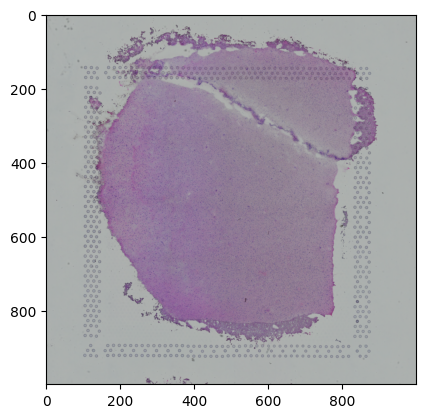

In [8]:
import matplotlib.pyplot as plt
im = sample.adata.uns['spatial']['ST']['images']['downscaled_fullres']
print(sample.adata.uns.keys())
print(sample.adata.uns['spatial'].keys())
print(sample.adata.uns['spatial']['ST'].keys())
print(sample.adata.uns['spatial']['ST']['images'].keys())
print(sample.adata.uns['spatial']['ST']['scalefactors'].keys())
print(sample.adata.uns['spatial']['ST']['scalefactors']['tissue_downscaled_fullres_scalef'])
print(sample.adata.uns['spatial']['ST']['scalefactors']['spot_diameter_fullres'])


plt.imshow(im)

In [9]:
slide = sample.wsi
type(slide)

hestcore.wsi.OpenSlideWSI

In [10]:
vars(sample.adata).keys()

dict_keys(['_is_view', '_adata_ref', '_oidx', '_vidx', 'file', '_X', '_obs', '_var', '_uns', '_obsm', '_varm', '_obsp', '_varp', '_raw', '_layers'])

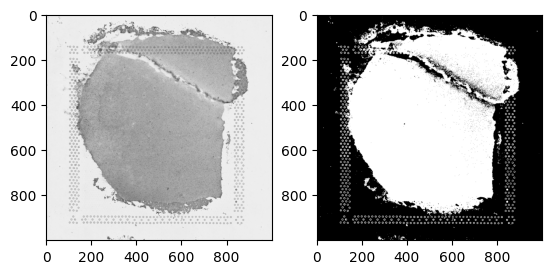

In [11]:
from skimage.filters import threshold_otsu
grey = 0.2125 * im[:,:,0] + 0.7154 * im[:,:,1] + 0.0721 * im[:,:,2]
t = threshold_otsu(grey)
plt.subplot(1,2,1)
plt.imshow(grey,cmap='grey')
plt.subplot(1,2,2)
plt.imshow(~(grey > t),cmap='grey')